<a href="https://colab.research.google.com/github/HRJ369/DH_307/blob/main/DH_307_ppg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PPG Signal Values: [33665.04661017 33872.02881356 34164.23898305 34371.22118644
 34541.67711864 34639.08050847 34651.2559322  34639.08050847
 34639.08050847 34797.36101695]


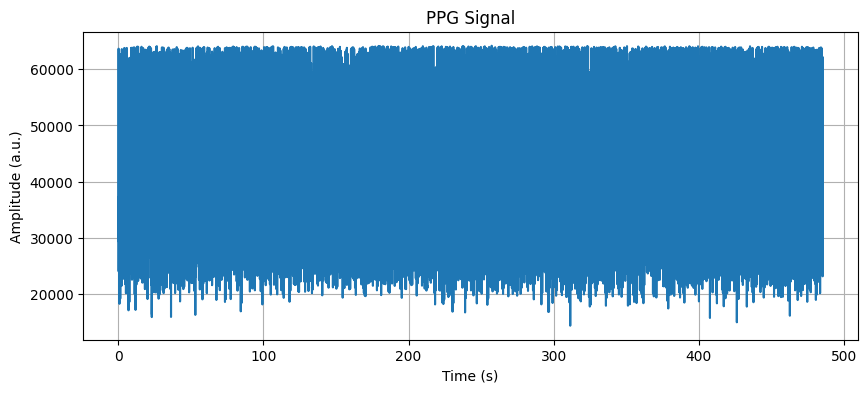

In [5]:
import wfdb
import requests
import matplotlib.pyplot as plt

# URLs for the .hea and .dat files from GitHub
hea_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.hea'
dat_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.dat'

# Download the .hea and .dat files
hea_content = requests.get(hea_url).text
dat_content = requests.get(dat_url).content

# Save the downloaded content to local files
with open('s10_run.hea', 'w') as f:
    f.write(hea_content)

with open('s10_run.dat', 'wb') as f:
    f.write(dat_content)

# Load the dataset using wfdb (make sure the file name matches what was saved)
record = wfdb.rdrecord('s10_run')

# Extract the PPG signal and time
ppg_signal = record.p_signal[:, 0]
time = [i / record.fs for i in range(len(ppg_signal))]

# Print the first few values of the signal
print("PPG Signal Values:", ppg_signal[:10])  # Check the first 10 values

# Plot the PPG signal
plt.figure(figsize=(10, 4))
plt.plot(time, ppg_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.title('PPG Signal')
plt.grid()
plt.show()


In [6]:

pip install scipy

PPG Signal Values: [33665.04661017 33872.02881356 34164.23898305 34371.22118644
 34541.67711864 34639.08050847 34651.2559322  34639.08050847
 34639.08050847 34797.36101695]


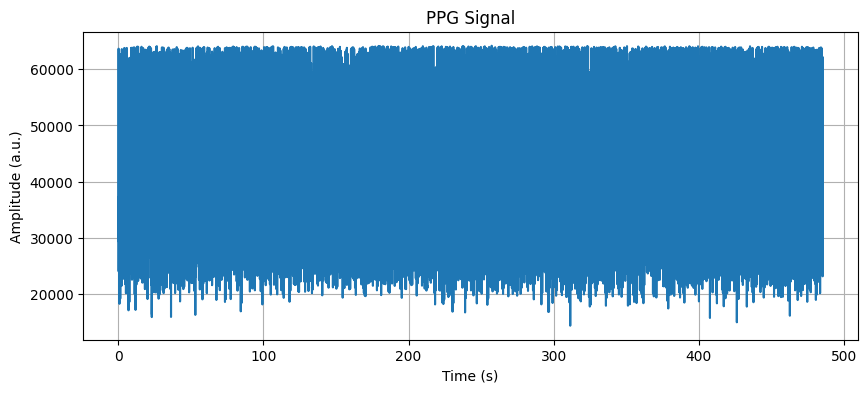

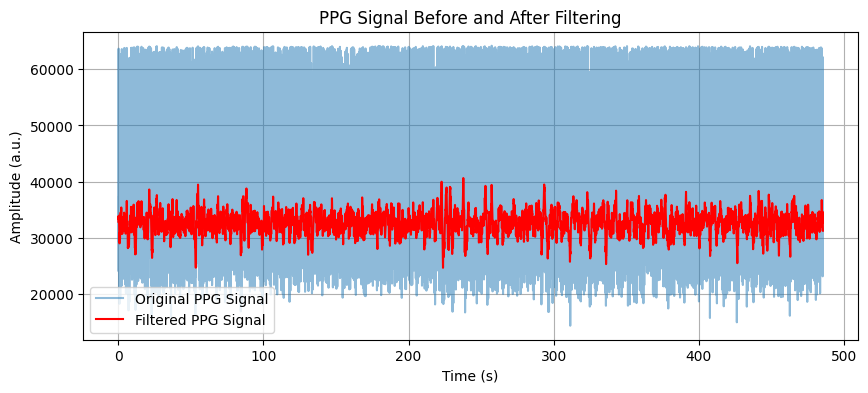

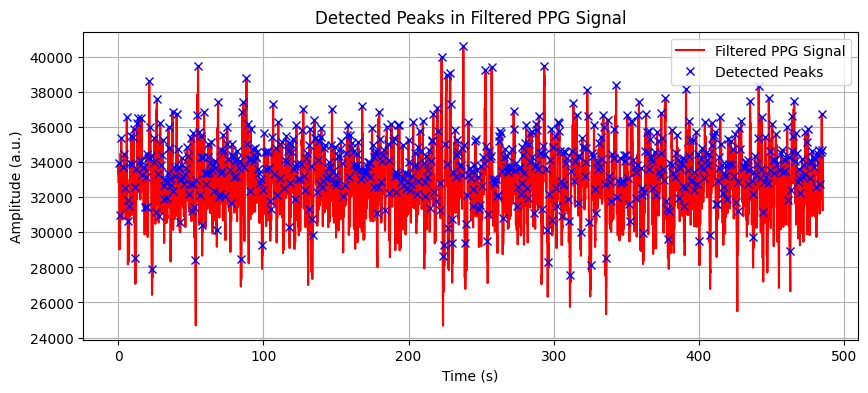

In [17]:
import wfdb
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# URLs for the .hea and .dat files from GitHub
hea_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.hea'
dat_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.dat'

# Download the .hea and .dat files
hea_content = requests.get(hea_url).text
dat_content = requests.get(dat_url).content

# Save the downloaded content to local files
with open('s10_run.hea', 'w') as f:
    f.write(hea_content)

with open('s10_run.dat', 'wb') as f:
    f.write(dat_content)

# Load the dataset using wfdb
record = wfdb.rdrecord('s10_run')

# Extract the PPG signal and time
ppg_signal = record.p_signal[:, 0]
time = np.arange(len(ppg_signal)) / record.fs  # Adjusted to ensure correct time array

# Print the first few values of the signal
print("PPG Signal Values:", ppg_signal[:10])  # Check the first 10 values

# Plot the original PPG signal
plt.figure(figsize=(10, 4))
plt.plot(time, ppg_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.title('PPG Signal')
plt.grid()
plt.show()

# Low-pass filter function
def lowpass_filter(data, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Define filter parameters
cutoff_frequency = 3.0  # Cut-off frequency in Hz (adjust based on your needs)
fs = record.fs  # Sampling frequency from the .hea file

# Apply the low-pass filter
filtered_ppg_signal = lowpass_filter(ppg_signal, cutoff_frequency, fs)

# Plot the original and filtered signals
plt.figure(figsize=(10, 4))
plt.plot(time, ppg_signal, label='Original PPG Signal', alpha=0.5)
plt.plot(time, filtered_ppg_signal, label='Filtered PPG Signal', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.title('PPG Signal Before and After Filtering')
plt.legend()
plt.grid()
plt.show()

# Peak detection
peaks, _ = find_peaks(filtered_ppg_signal, height=0, distance=fs*0.5)  # Adjust height and distance as needed

# Ensure peaks are integers for indexing
peaks = peaks.astype(int)

# Plot the filtered signal with detected peaks
plt.figure(figsize=(10, 4))
plt.plot(time, filtered_ppg_signal, label='Filtered PPG Signal', color='red')
plt.plot(time[peaks], filtered_ppg_signal[peaks], "x", label='Detected Peaks', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Detected Peaks in Filtered PPG Signal')
plt.legend()
plt.grid()
plt.show()

# Print the peak indices and their corresponding time values
#print("Peak indices:", peaks)
#print("Peak times (s):", time[peaks])
#print("Peak amplitudes:", filtered_ppg_signal[peaks])


PPG Signal Values: [33665.04661017 33872.02881356 34164.23898305 34371.22118644
 34541.67711864 34639.08050847 34651.2559322  34639.08050847
 34639.08050847 34797.36101695]
Detected Peak Times (s): [3.56000e-01 9.70000e-01 1.99000e+00 2.93000e+00 3.45800e+00 3.98800e+00
 4.84400e+00 5.77800e+00 6.30000e+00 6.88400e+00 7.53400e+00 8.12000e+00
 8.70800e+00 9.34600e+00 9.94200e+00 1.05240e+01 1.11340e+01 1.17620e+01
 1.23680e+01 1.29820e+01 1.38580e+01 1.47620e+01 1.53560e+01 1.59240e+01
 1.65020e+01 1.70960e+01 1.76600e+01 1.82620e+01 1.88740e+01 1.94680e+01
 2.00240e+01 2.07000e+01 2.12640e+01 2.19020e+01 2.24140e+01 2.33860e+01
 2.42340e+01 2.47940e+01 2.56560e+01 2.65100e+01 2.73420e+01 2.79240e+01
 2.88340e+01 2.93520e+01 2.99960e+01 3.05300e+01 3.11120e+01 3.17380e+01
 3.22980e+01 3.28620e+01 3.34460e+01 3.40320e+01 3.45780e+01 3.51120e+01
 3.56480e+01 3.64720e+01 3.73240e+01 3.79480e+01 3.84740e+01 3.90400e+01
 4.01660e+01 4.07720e+01 4.13460e+01 4.18860e+01 4.24680e+01 4.30760e+01

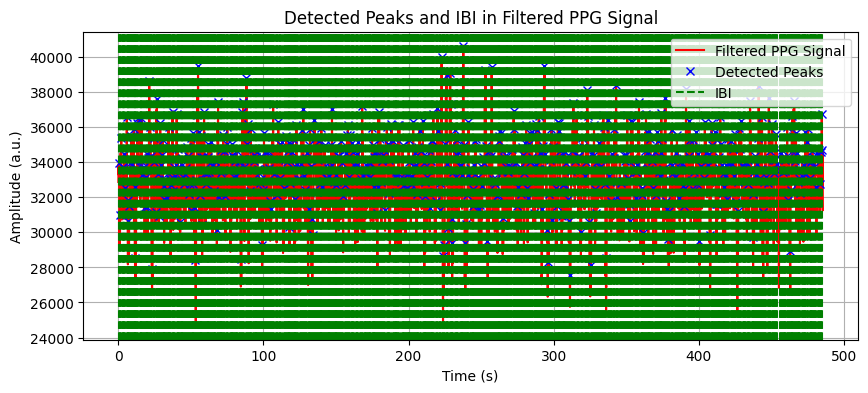

In [19]:
import wfdb
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# URLs for the .hea and .dat files from GitHub
hea_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.hea'
dat_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.dat'

# Download the .hea and .dat files
hea_content = requests.get(hea_url).text
dat_content = requests.get(dat_url).content

# Save the downloaded content to local files
with open('s10_run.hea', 'w') as f:
    f.write(hea_content)

with open('s10_run.dat', 'wb') as f:
    f.write(dat_content)

# Load the dataset using wfdb
record = wfdb.rdrecord('s10_run')

# Extract the PPG signal and time
ppg_signal = record.p_signal[:, 0]
time = np.arange(len(ppg_signal)) / record.fs  # Adjusted to ensure correct time array

# Print the first few values of the signal
print("PPG Signal Values:", ppg_signal[:10])  # Check the first 10 values

# Low-pass filter function
def lowpass_filter(data, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Define filter parameters
cutoff_frequency = 3.0  # Cut-off frequency in Hz (adjust based on your needs)
fs = record.fs  # Sampling frequency from the .hea file

# Apply the low-pass filter
filtered_ppg_signal = lowpass_filter(ppg_signal, cutoff_frequency, fs)

# Peak detection
peaks, _ = find_peaks(filtered_ppg_signal, height=0, distance=fs*0.5)  # Adjust height and distance as needed
peaks = peaks.astype(int)  # Ensure peaks are integers for indexing

# Calculate IBI
peak_times = time[peaks]  # Get the times of the detected peaks
IBI = np.diff(peak_times)  # Calculate differences between consecutive peak times

# Print the IBI values and the corresponding peak times
print("Detected Peak Times (s):", peak_times)
print("Inter-Beat Intervals (s):", IBI)

# Plot the filtered signal with detected peaks and IBI
plt.figure(figsize=(10, 4))
plt.plot(time, filtered_ppg_signal, label='Filtered PPG Signal', color='red')
plt.plot(time[peaks], filtered_ppg_signal[peaks], "x", label='Detected Peaks', color='blue')

# Marking IBI on the plot
for i in range(len(IBI)):
    plt.axvline(x=peak_times[i], color='green', linestyle='--', label='IBI' if i == 0 else "")

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Detected Peaks and IBI in Filtered PPG Signal')
plt.legend()
plt.grid()
plt.show()


Detected Peak Times (s): [3.56000e-01 9.70000e-01 1.99000e+00 2.93000e+00 3.45800e+00 3.98800e+00
 4.84400e+00 5.77800e+00 6.30000e+00 6.88400e+00 7.53400e+00 8.12000e+00
 8.70800e+00 9.34600e+00 9.94200e+00 1.05240e+01 1.11340e+01 1.17620e+01
 1.23680e+01 1.29820e+01 1.38580e+01 1.47620e+01 1.53560e+01 1.59240e+01
 1.65020e+01 1.70960e+01 1.76600e+01 1.82620e+01 1.88740e+01 1.94680e+01
 2.00240e+01 2.07000e+01 2.12640e+01 2.19020e+01 2.24140e+01 2.33860e+01
 2.42340e+01 2.47940e+01 2.56560e+01 2.65100e+01 2.73420e+01 2.79240e+01
 2.88340e+01 2.93520e+01 2.99960e+01 3.05300e+01 3.11120e+01 3.17380e+01
 3.22980e+01 3.28620e+01 3.34460e+01 3.40320e+01 3.45780e+01 3.51120e+01
 3.56480e+01 3.64720e+01 3.73240e+01 3.79480e+01 3.84740e+01 3.90400e+01
 4.01660e+01 4.07720e+01 4.13460e+01 4.18860e+01 4.24680e+01 4.30760e+01
 4.35800e+01 4.41260e+01 4.47840e+01 4.53200e+01 4.58780e+01 4.64440e+01
 4.75580e+01 4.81400e+01 4.87500e+01 4.92900e+01 4.98640e+01 5.05360e+01
 5.11360e+01 5.17120e+01 5

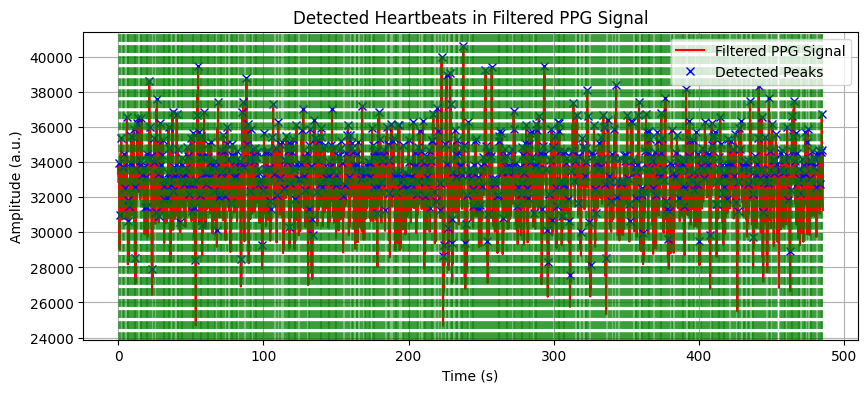

In [20]:
import wfdb
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# URLs for the .hea and .dat files from GitHub
hea_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.hea'
dat_url = 'https://raw.githubusercontent.com/HRJ369/DH_307/refs/heads/main/s10_run.dat'

# Download the .hea and .dat files
hea_content = requests.get(hea_url).text
dat_content = requests.get(dat_url).content

# Save the downloaded content to local files
with open('s10_run.hea', 'w') as f:
    f.write(hea_content)

with open('s10_run.dat', 'wb') as f:
    f.write(dat_content)

# Load the dataset using wfdb
record = wfdb.rdrecord('s10_run')

# Extract the PPG signal and time
ppg_signal = record.p_signal[:, 0]
time = np.arange(len(ppg_signal)) / record.fs  # Adjusted to ensure correct time array

# Low-pass filter function
def lowpass_filter(data, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Define filter parameters
cutoff_frequency = 3.0  # Cut-off frequency in Hz (adjust based on your needs)
fs = record.fs  # Sampling frequency from the .hea file

# Apply the low-pass filter
filtered_ppg_signal = lowpass_filter(ppg_signal, cutoff_frequency, fs)

# Peak detection
peaks, _ = find_peaks(filtered_ppg_signal, height=0, distance=fs*0.5)  # Adjust height and distance as needed
peaks = peaks.astype(int)  # Ensure peaks are integers for indexing

# Calculate IBI
peak_times = time[peaks]  # Get the times of the detected peaks
IBI = np.diff(peak_times)  # Calculate differences between consecutive peak times

# Print the IBI values and the corresponding peak times
print("Detected Peak Times (s):", peak_times)
print("Inter-Beat Intervals (s):", IBI)

# Plot the filtered signal with detected peaks and heartbeat markers
plt.figure(figsize=(10, 4))
plt.plot(time, filtered_ppg_signal, label='Filtered PPG Signal', color='red')
plt.plot(time[peaks], filtered_ppg_signal[peaks], "x", label='Detected Peaks', color='blue')

# Mark each heartbeat with a vertical line at each peak
for peak_time in peak_times:
    plt.axvline(x=peak_time, color='green', linestyle='--', alpha=0.5)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Detected Heartbeats in Filtered PPG Signal')
plt.legend()
plt.grid()
plt.show()
